# Sistemas Lineares

Considere as seguintes equações

$$\begin{array}{r}
       x_{1} & + & 5 \, x_{2} & - & 5.3 \, x_{3} & = & y_{1} \\
2.4 \, x_{1} & - & 2 \, x_{2} & + & x_{3} & = & y_{2} \\
7.8 \, x_{1} & - & 4.1 \, x_{2} & + & 6.4 \, x_{3} & = & y_{3} \\
\end{array} \: .
$$

Repare que $y_i, i = 1, 2, 3, $ são [combinações lineares](https://en.wikipedia.org/wiki/Linear_combination) das variáveis $x_1, x_2, x_3$. Significa que as derivadas de $y_i, i = 1, 2, 3$, em relação a qualquer variável $x_1, x_2, x_3$ não depende das variáveis $x_1, x_2, x_3$. Por exemplo, a derivada de $y_2$ em relação a $x_3$ é igual a $1$.

Esse sistema de equações pode ser escrito em notação matricial da seguinte maneira:

$$\mathbf{A}\, \mathbf{x} = \mathbf{y} \: ,$$

em que

$$\mathbf{A} = \left[
\begin{array}{ccc}
1 & 5 & -5.3 \\
2.4 & -2 & 1 \\
7.8 & -4.1 & 6.4
\end{array}
\right] \: ,$$

$$\mathbf{y} = \left[
\begin{array}{c}
y_{1} \\
y_{2} \\
y_{3}
\end{array}
\right]$$

e

$$\mathbf{x} = \left[
\begin{array}{c}
x_{1} \\
x_{2} \\
x_{3}
\end{array}
\right] \: .$$

Essas equações são comumente chamadas de sistema de equações lineares ou simplesmente sistema lineares.

Os sistemas lineares são muito comuns em problemas geofísicos. Em geral, 𝐲 contém os dados geofísicos (ou dados observados), por exemplo, dados de anomalias de gravidade, dados de anomalias de campo total, tempos de transito de ondas sísmicas, componentes horizontais e verticais dos campos eletromagnéticos, etc. Então, 𝐲 é normalmente conhecido. Da mesma forma, a matriz 𝐀 também contém informações conhecidas (por exemplo, tempo, distância, profundidade até o topo de um corpo geológico, etc.). Por outro lado, o vetor 𝐱 geralmente contém as incógnitas, que são os parâmetros a serem estimados através da solução do sistema linear. Por exemplo, eles podem representar uma distribuição de momento magnético, distribuição de contraste de densidade, resistividade etc. 

Portanto, resolver um sistema linear significa determinar o vetor 𝐱 a partir dos valores de 𝐀 e 𝐲. A complexidade do algoritmo utilizado para resolver um sistema linear depende principalmente da estrutura da matriz 𝐀. O numpy.linalg fornece muitas rotinas de álgebra linear. As células abaixo mostram uma aplicação da rotina numpy.linalg.solve para a solução de um sistema linear.

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Seja `A` uma matriz diagonal definida como:

In [ ]:
np.random.seed(10)
a = np.round(np.random.rand(3),decimals=3)

In [ ]:
a

In [ ]:
A = np.diag(a)

In [ ]:
print(A)

e `x` e `y` vetores definidos por:

In [ ]:
x = np.round(np.random.rand(3),decimals=3)*3
print(x)

In [ ]:
y = np.dot(A,x)
print(y)

Podemos calcular `x_calc` apenas dividindo cada elemento de `y`pelos elementos da diagonal de `A`

In [ ]:
x_calc = y/np.diag(A)
print(x_calc)

In [ ]:
y_calc = np.dot(A,x_calc)
print(y_calc)

In [ ]:
np.allclose(x,x_calc)

In [ ]:
np.allclose(y,y_calc)

### Matriz triangular

Agora considere que `A` é uma matriz triangular inferior

In [ ]:
A = np.random.rand(3,3)
A = np.tril(A)
A = np.round(A,decimals=3)

In [ ]:
A

In [ ]:
# A = np.random.rand(3,3)
# A = np.triu(A)
# A = np.round(A,decimals=3)
# A

In [ ]:
x = np.round(np.random.rand(3),decimals=3)*3
y = np.dot(A,x)

In [ ]:
print(x)
print(y)

A solução do sistema `Ax_calc = y_calc` é dada por:

In [ ]:
x_calc = np.linalg.solve(A,y)
x_calc

Para verificar se `x_calc` é uma solução para o sistema basta calcular o `y`produzido por `x_calc` e comparar os dois vetores.

In [ ]:
y_calc = np.dot(A,x_calc)
y_calc

In [ ]:
np.allclose(x,x_calc)

In [ ]:
np.allclose(y,y_calc)

### Matriz quadrada cheia

Finalmente, vamos considerar que a matriz A é uma matriz quadrada cheia. A solução para o sistema linear que envolve uma matriz desse tipo é mais complexa e envolve a solução pormétodos numéricos. O numpy possui funções que calculam esse sistema diretamente (como o `numpy.linalg.solve`).

Considere `A` uma matriz quadrada cheia dada por:

In [ ]:
A = np.random.rand(3,3)
A = np.round(A,decimals=3)
A

In [ ]:
x = np.round(np.random.rand(3),decimals=3)*3

In [ ]:
y = np.dot(A,x)

In [ ]:
x_calc = np.linalg.solve(A,y)

In [ ]:
x_calc

In [ ]:
y_calc = np.dot(A,x_calc)

In [ ]:
print(x)
print(x_calc)

In [ ]:
print(y)
print(y_calc)

## Ajustar uma reta

Considere um vetor de dados $\mathbf d$ $N \times 1$ cujo $i$-ésimo elemento $d_i$ é dado por:

$$
d_{i} = f(x_{i}) \: ,
$$

em que $f(x)$ é uma função desconhecida qie depende da variável $x$. Além disso, considere que cada $d_i$ pode ser aproximado por: 

$$
d_{i} \approx a + b \, x_{i} \: ,
$$

em que $a$ e $b$ são constantes desconhecidas.

Dado um vetor de dados $\mathbf d$ e um vetor $\mathbf x$ contendo as coordenadas, vamos estimas as constantes $a$ e $b$ usando o `numpy.linalg.solve`

$$\begin{array}{r}
       y_0 & = & a \, + & b \, x_{0}  \\
y_1 & = & a \, + & b \, x_{1} \\
\end{array} \: ,
$$

$$\mathbf{y} = \left[
\begin{array}{c}
-4.8 \\
-3.9 
\end{array}
\right] \: .$$

$$\mathbf{x} = \left[
\begin{array}{c}
2 \\
11 
\end{array}
\right] \: .$$

In [ ]:
# coordenadas do dado
x = np.array([2., 11.])

xmax = np.max(x)
xmin = np.min(x)
Dx = xmax - xmin

# valores verdadeiros de a e b
a = -5.
b = 0.1

# vetor de dados y
y = a + b*x

print(y)

In [ ]:
A = np.polynomial.polynomial.polyvander(x,1)
print(A)

In [ ]:
p = np.linalg.solve(A,y)

In [ ]:
print(p)

# Mínimos quadrados

Esse conteúdo foi baseado e traduzido do repositório https://nbviewer.jupyter.org/github/birocoles/Disciplina-metodos-computacionais/blob/master/Content/least_squares.ipynb.

Vamos considerar um conjunto de medidas $d_i, i = 0, 1, ..., N-1$, de uma determidada quantidade física. Essas medidas são normalmente chamadas **dados observados**. Vamos considerar também que cada dado observado $d_i$ pode ser aproximado por uma função $y_i, i = 0, 1, ..., N-1$, dada por:

<a id='eq1'></a>
$$
y_{i} = a_{i0} \, p_{0} + a_{i1} \, p_{1} + \cdots + a_{i(M-1)} \, p_{(M-1)} \: , \tag{1}
$$

em que $a_{ij}$ são variáveis conhecidas e $p_j$ são variáveis desconhecidas, $i = 0, 1, ..., N-1, j = 0, 1, ..., M-1, N > M.$ $y_i$ é usualmente chamado de **dado predito**.

Então, considerando $N$ medidas, temos

<a id='eq2'></a>
$$
\begin{split}
d_{0} &\approx \; &y_{0} &= \: &a_{00} \, p_{0} + &a_{01} \, p_{1} + \cdots + &a_{0(M-1)} \, p_{M-1} \\
d_{1} &\approx &y_{1} &= &a_{10} \, p_{0} + &a_{11} \, p_{1} + \cdots + &a_{1(M-1)} \, p_{M-1} \\
\vdots & &\vdots & & \: \vdots & \: \vdots & \: \vdots \\
d_{N-1} &\approx &y_{N-1} &= &a_{(N-1)0} \, p_{0} + &a_{(N-1)1} \, p_{1} + \cdots + &a_{(N-1)(M-1)} \, p_{M-1}
\end{split} \tag{2}
$$

ou em notação matricial,

<a id='eq3'></a>
$$
\mathbf{d} \approx \mathbf{y} = \mathbf{A} \, \mathbf{p} \: , \tag{3}
$$

em que

<a id='eq4'></a>
$$
\mathbf{p} = 
\left[ \begin{array}{c}
p_{0} \\
p_{1} \\
\vdots \\
p_{M-1}
\end{array} \right] \: , \tag{4}
$$

<a id='eq5'></a>
$$
\mathbf{y} = 
\left[ \begin{array}{c}
y_{0} \\
y_{1} \\
\vdots \\
y_{N-1}
\end{array} \right] \: , \tag{5}
$$

<a id='eq6'></a>
$$
\mathbf{d} = 
\left[ \begin{array}{c}
d_{0} \\
d_{1} \\
\vdots \\
d_{N-1}
\end{array} \right] \tag{6}
$$

e

<a id='eq7'></a>
$$
\mathbf{A} = 
\left[ \begin{array}{cccc}
a_{00} & a_{01} & \cdots & a_{0(M-1)} \\
a_{10} & a_{11} & \cdots & a_{1(M-1)} \\
\vdots & \vdots &        & \vdots \\
a_{(N-1)0} & a_{(N-1)1} & \cdots & a_{(N-1)(M-1)}
\end{array} \right] \quad . \tag{7}
$$

Os vetores $\mathbf p$, $\mathbf y$, e $\mathbf d$ são normalmente chamados de vetor de parâmetros, vetor de dados preditos e vetor de dados observados, respectivamente. Observe que a determinação do vetor de parâmetros $\mathbf p$ a partir dos de $\mathbf d$ e $\mathbf A$ requer a solução de um sistema linear em que $\mathbf A$ não é quadrada.

Agora, considere o problema de determinar $\mathbf p$ a partir dos dados observados $\mathbf d$ e da matriz $N \times M$ $\mathbf A$. Matematicamente, este problema consiste em determinar um vetor $ \mathbf p = \mathbf{\tilde{p}}$ produzindo um $\mathbf y$ "o mais próximo possível" de $\mathbf d$. Para resolver este problema, precisamos definir o que significa "o mais próximo possível". A noção de "proximidade" está intrinsecamente relacionada com a noção de "distância" e, consequentemente, com a noção de norma.


Por exemplo, vamos considerar um vetor $\mathbf r = \mathbf d - \mathbf y$, que é definido como a diferença entre os dados observados $\mathbf d$ e os dados preditos $\mathbf y$. O vetor $\mathbf r$ é normalmente chamado de vetor de resíduos. O tamanho do vetor de resíduos pode ser determinado pela seguinte função escalar:

<a id='eq8'></a>
$$
\begin{split}
\| \mathbf{r} \|_{2} &= \sqrt{\mathbf{r}^{\top}\mathbf{r}} \\
&= \sqrt{\sum \limits_{i = 0}^{N-1} r_{i}^{2}}
\end{split} \: , \tag{8}
$$

em que $r_{i} = d_{i} - y_{i}$, $i = 0, \dots, N-1$. Esta função é uma norma que quantifica a "distância" entre os vetores 𝐝 e 𝐲. É chamada **<a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm">Norma Euclidiana</a>** (ou **distância Euclidiana**). Note que esta função é igual a zero se $\mathbf{d} = \mathbf{y}$  e é maior que zero se $\mathbf{d} \ne \mathbf{y}$.



Portanto, o problema de determinar um vetor $\mathbf{p} = \tilde{\mathbf{p}}$ 
produzindo um $\mathbf{y}$ "o mais próximo possível" de $\mathbf{d}$ pode ser pensado no problema de determinar um vetor de parâmetros $\mathbf{p} = \tilde{\mathbf{p}}$ produzindo a norma mínima euclidiana da diferença entre os dados observados $\mathbf{d}$ e os dados previstos $\mathbf{y}$.

Na prática, ao invés de determinar o vetor $\tilde{\mathbf{p}}$ minimizando a norma euclidiana de $\mathbf r$, determinamos o vetor $\tilde{\mathbf{p}}$ minimizando o **quadrado da norma Euclidiana** (ou **<a href="https://en.wikipedia.org/wiki/Euclidean_distance">Quadrado da distância Euclidiana</a>** ou a norma $L_{2}$) de $\mathbf{r}$, que é dada por:

<a id='eq9'></a>
$$
\begin{split}
\| \mathbf{r} \|_{2}^{2} &= \mathbf{r}^{\top}\mathbf{r} \\
&= \sum \limits_{i = 0}^{N-1} r_{i}^{2}
\end{split} \: . \tag{9}
$$

Observe que a norma Euclidiana quadrada de $\mathbf{r}$ é uma função escalar, dependendo dos parâmentros desconhecidos $\mathbf{p}$ e pode ser escrita da seguinte forma: 

<a id='eq10'></a>
$$
\Phi(\mathbf{p}) = \left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right]^{\top}\left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right] \: . \tag{10}
$$

Essa função é chamada **função do ajuste** ou em inglês, **misfit function**. 

Considerando que existe apenas um vetor de parâmetros $\tilde{\mathbf{p}}$ que minimiza a função do ajuste $\Phi(\mathbf{p})$, podemos afirmar que

<a id='eq11'></a>
$$
\Phi(\tilde{\mathbf{p}} + \Delta \mathbf{p})
\begin{cases}
\gt \Phi(\tilde{\mathbf{p}}) \, , \: \text{if} \:\: \| \Delta \mathbf{p}\|_{2} \ne 0 \\
= \Phi(\tilde{\mathbf{p}}) \, , \: \text{if} \:\: \| \Delta \mathbf{p}\|_{2} = 0 \\
\end{cases} \quad . \tag{11}
$$

Podemos usar a função do ajuste para estimar o vetor de parâmetros estimados $\tilde{\mathbf{p}}$. Para isso, podemos simplesmente calcular a função do ajuste produzida por um conjunto de vetores de parâmetros e escolher o vetor de parâmetros que produza o valor mínimo da função do ajuste.

Alternativamente, podemos estimar o vetor $\tilde{\mathbf{p}}$ explorando as derivadas da função ajuste com respeito às componentes  $p_{j}$, $j = 1, \dots, M$, do vetor de parâmetros. Sabemos que, se a função do ajuste assume um valor mínimo em $\tilde{\mathbf{p}}$ , então seu gradiente avaliado em $\tilde{\mathbf{p}}$ equivale ao vetor nulo. Isso significa que

<a id='eq12'></a>
$$
\nabla \Phi(\tilde{\mathbf{p}}) = 
\left[ \begin{array}{c}
0 \\
\vdots \\
0
\end{array} \right] \: , \tag{12}
$$

em que

<a id='eq13'></a>
$$
\nabla \Phi(\mathbf{p}) = 
\left[ \begin{array}{c}
\dfrac{\partial \, \Phi(\mathbf{p})}{\partial \, p_{0}} \\
\vdots \\
\dfrac{\partial \, \Phi(\mathbf{p})}{\partial \, p_{M-1}} 
\end{array} \right] \tag{13}
$$

é o gradiente de $\Phi(\mathbf{p})$ ([equação 10](#eq10)). 

O $j$ ésimo elemento do gradiente $\nabla \Phi(\mathbf{p})$ ([equação 12](#eq12)) é dado por:

<a id='eq14'></a>
$$
\begin{split}
\dfrac{\partial \, \Phi(\mathbf{p})}{\partial \, p_{j}} &= 
\Big \{ \dfrac{\partial}{\partial \, p_{j}} \left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right] \Big \} 
^{\top}\left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right] +
\left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right]^{\top}
\Big \{ \dfrac{\partial}{\partial \, p_{j}} \left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right] \Big \} \\
&= 2\Big \{ \dfrac{\partial}{\partial \, p_{j}} \left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right] \Big \} 
^{\top}\left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right] \\
&= 2 \Big \{ -\mathbf{u}_{j}^{\top}\mathbf{A}^{\top} \Big \} \left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right]
\end{split} \: , \tag{14}
$$

em que $\mathbf{u}_{j}$ é um vetor $M \times 1$ cujo $j$ ésimo elemento é igual a $1$ e todos os demais elementos são iguais a $0$. Substituindo $\frac{\partial \, \Phi(\mathbf{p})}{\partial \, p_{j}}$ ([equação 14](#eq14)) no gradiente da ([equação 13](#eq13)), temos

<a id='eq15'></a>
$$
\nabla \Phi(\mathbf{p}) = -2 \mathbf{A}^{\top} \left[ \mathbf{d} - \mathbf{A}\mathbf{p} \right] \: . \tag{15}
$$

Finalmente, avaliando o gradiente $\nabla \Phi(\mathbf{p})$ ([equação 13](#eq13)) em $\mathbf{p} = \tilde{\mathbf{p}}$ ([equação 11](#eq11)), temos

<a id='eq16'></a>
$$
\begin{align}
\nabla \Phi(\tilde{\mathbf{p}}) &= -2 \mathbf{A}^{\top} \left[ \mathbf{d} - \mathbf{A}\tilde{\mathbf{p}} \right] \tag{16a} \\
\mathbf{0} &= -\mathbf{A}^{\top}\mathbf{d} + \mathbf{A}^{\top}\mathbf{A}\tilde{\mathbf{p}} \tag{16b}
\end{align}
$$

resultando em

<a id='eq17'></a>
$$
\left( \mathbf{A}^{\top}\mathbf{A} \right) \tilde{\mathbf{p}} = \mathbf{A}^{\top}\mathbf{d} \: . \tag{17}
$$

Essas equações são comumente chamadas de **Estimador de Mínimos Quadrados**.

Note que, para determinar o vetor $\tilde{\mathbf{p}}$, é necessário resolver um sistema linear quadrado com a matriz simétrica $\mathbf{A}^{\top}\mathbf{A}$ e um vetor independente  $\mathbf{A}^{\top}\mathbf{d}$.

### Ajustar uma reta  - matriz A não quadrada

In [ ]:
# número de dados
N = 31

# coordenadas dos dados
x = np.linspace(0,30,N)

# valores verdadeiros para a e b
a = -5.
b = 0.1

# vetor de dados verdadeiros
d = a + b*x

print(d)

In [ ]:
#Gerar matriz A

A = np.polynomial.polynomial.polyvander(x,1)
print(A.T)

In [ ]:
ATA = np.dot(A.T,A)
ATd = np.dot(A.T,d)

In [ ]:
p = np.linalg.solve(ATA,ATd)

In [ ]:
p

In [ ]:
d_predito = p[0] + p[1]*x


In [ ]:
plt.plot(x,d,'-')
plt.plot(x,d_predito,'o')
plt.xlabel('x')
plt.ylabel('y')

### Ajustando uma parábola

Seja um conjunto de dados $\mathbf y$ e $\mathbf t$ um vetor que contém valores de tempo, calcule o vetor de parâmetros $\mathbf m$ de acordo com a equação a seguir:

$$
y_{i} = m_{1} + m_{2}t_{i} - \frac{1}{2}m_{3}t_{i}² \: ,
$$

$$\mathbf{y} = \left[
\begin{array}{c}
105.1 \\
190.4 \\
265.9 \\
331.6 \\
387.5 \\
433.6 \\
469.9 \\
496.4 \\
513.1 \\
520.
\end{array}
\right]$$

,

$$\mathbf{t} = \left[
\begin{array}{c}
1 \\
2 \\
3 \\
4 \\
5 \\
6 \\
7 \\
8 \\
9 \\
10
\end{array}
\right]$$

e

$$\mathbf{m} = \left[
\begin{array}{c}
m_1 \\
m_2 \\
m_3 
\end{array}
\right]$$

Depois de calcula o vetor $\mathbf m$, calcule o dado predito e plote o ajuste (dado verdadeiro e dado predito).

In [ ]:
# tempo
t = np.linspace(1,10,10)

# dados
d_obs = np.array([105.1, 190.4, 265.9, 331.6, 387.5, 433.6, 469.9, 496.4, 513.1,
       520. ])

In [ ]:
plt.plot(t,d_obs, 'o')
plt.xlabel('Tempo')
plt.ylabel('Altura')

In [ ]:
# Defina a matriz A usando np.polynomial.polynomial.polyvander(x,2). 

A = np.polynomial.polynomial.polyvander(t,2)
A[:,2] = A[:,2]*(-1/2)
print(A)

In [ ]:
# Calcule o vetor m

ATA = np.dot(A.T,A)
ATd = np.dot(A.T,d_obs)

m_calculado = np.linalg.solve(ATA,ATd)

print(m_calculado)

In [ ]:
d_predito = np.dot(A,m_calculado)

In [ ]:
# Plote o ajuste

plt.plot(t,d_obs, 'o')
plt.plot(t,d_predito)
plt.xlabel('Tempo')
plt.ylabel('Altura')

### Tomografia Simples

Exemplo retirado do Menke (2018)

Suponha que uma parede seja montada a partir de um conjunto retangular de tijolos (Fig. 1) e que cada tijolo seja composto de um tipo diferente de argila. Se as velocidades acústicas das diferentes argilas forem diferentes, pode-se tentar distinguir os diferentes tipos de tijolos medindo o tempo de viagem do som através das várias fileiras e colunas de tijolos na parede. Os dados neste problema são compõem um vetor com $N = 6$ medições de tempos de trânsito, dado por $\textbf d = [T_1 ,T_2, T_3, T_4, T_5, T_6 ]^T$. O modelo assume que cada tijolo é composto de um material uniforme e que o tempo de trânsito do som através de cada tijolo é proporcional à largura e à altura do tijolo. O fator de proporcionalidade é a vagarosidade ( _slowness_ ) $s_i$ do tijolo, resultando em um vetor $M = 4$ parâmetros representado por $\textbf s = [s_1, s_2, s_3, s_4 ]^T$. 

A equação que relaciona dos dados e os parâmetros é dada por:

$$
T_{1} = h s_{1} + h s_{2} \\
T_{2} = h s_{3} + h s_{4}  \\
T_{3} = h s_{1} + h s_{3} \\
T_{4} = h s_{2} + h s_{4}  \\
T_{5} = h s_{1} + h s_{4} \\
T_{6} = hip s_{2} + hip s_{3} 
$$

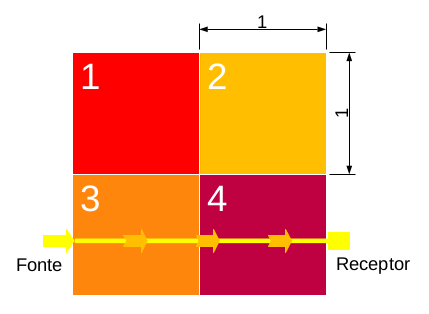

Calcule o a vagarosidade de cada tijolo, ou seja, estime um vetor $\textbf s$ através do estimador dos mínimos quadrados, como no exemplo anterior (da reta e da parábola).

In [ ]:
h = 1
hip = np.sqrt(2)
N = 6
M = 4

np.random.seed(10)
s_verdadeiro = (np.random.rand(4) * 10 )

print(s_verdadeiro)

T_verdadeiro = np.array([ 7.92072593, 13.82452117, 14.04968878,  7.69555832, 21.49780721,
        9.25461616])

#T_verdadeiro = np.dot(A,s_verdadeiro)
print(T_verdadeiro)

In [ ]:
# Defina a matriz A



In [ ]:
# Calcule o vetor s usando s_calculado = np.linalg.solve(ATA,ATd)

